In [3]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading the Data

In [4]:
data = pd.read_csv("weatherAUS.csv")

In [5]:
data.describe(include= "object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2016-07-14,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### checking missing values 

In [6]:
data.isnull().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Separation of Categorical (discrete) or Numerical (Contnious)

In [7]:
# Checking Categorical Features in dataset and counting it 
cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))

# Checking Numerical Features in dataset and counting it 
num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))

Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
Number of Numerical Features we have in data is : 16  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


In [8]:
# Checking Cardanility
for i  in cat_features:
  count = len(data[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


### Handling Cardinatlity issue

In [9]:
data["Date"] = pd.to_datetime(data["Date"])  
data["Year"] = data["Date"].dt.year           
data["Month"] = data["Date"].dt.month         
data["Day"] = data["Date"].dt.day  
data.drop("Date", axis = 1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Handling Missing values

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

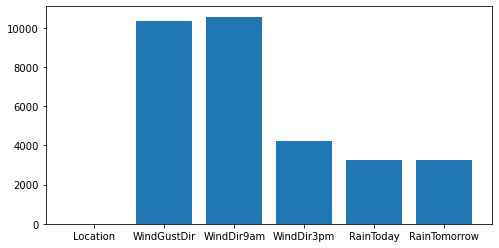

In [10]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype =="O"]
categorical_features  # now we have the features othe than date 
missing_cat = data[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values )# by visualization we can see that winDir3pm has large number of missing values 

In [11]:
cat_features_with_null = [features for features in categorical_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
   #each cat_feature is filled by most repeated value 
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])    
data[categorical_features].isnull().sum() 

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [12]:
num_col = [num_col for num_col in data.columns if data[num_col].dtype !="O"] 
#numerical features extraction from the data 
missing_num = data[num_col].isnull().sum()    # counting missing values in each  num_feature 
missing_num


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [13]:
# Remove Outliers from Numerical Features 
num_col_with_null_values = [col for col in num_col if data[col].isnull().sum()]
missing_values = data[num_col_with_null_values].isnull().sum()
missing_values
features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

for features in num_col_with_null_values:
  data[features] = data[features].fillna(data[features].mean())   # all missing values imputed by mean 
data[num_col_with_null_values].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Exploring Numerical Variables

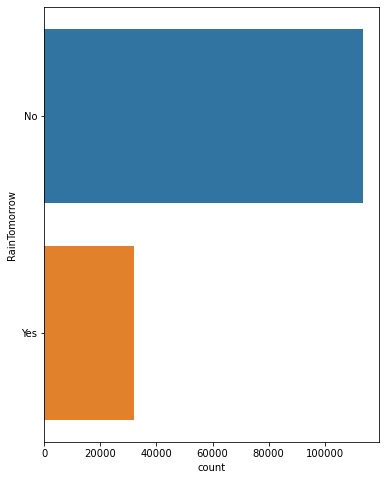

(145460, 6)

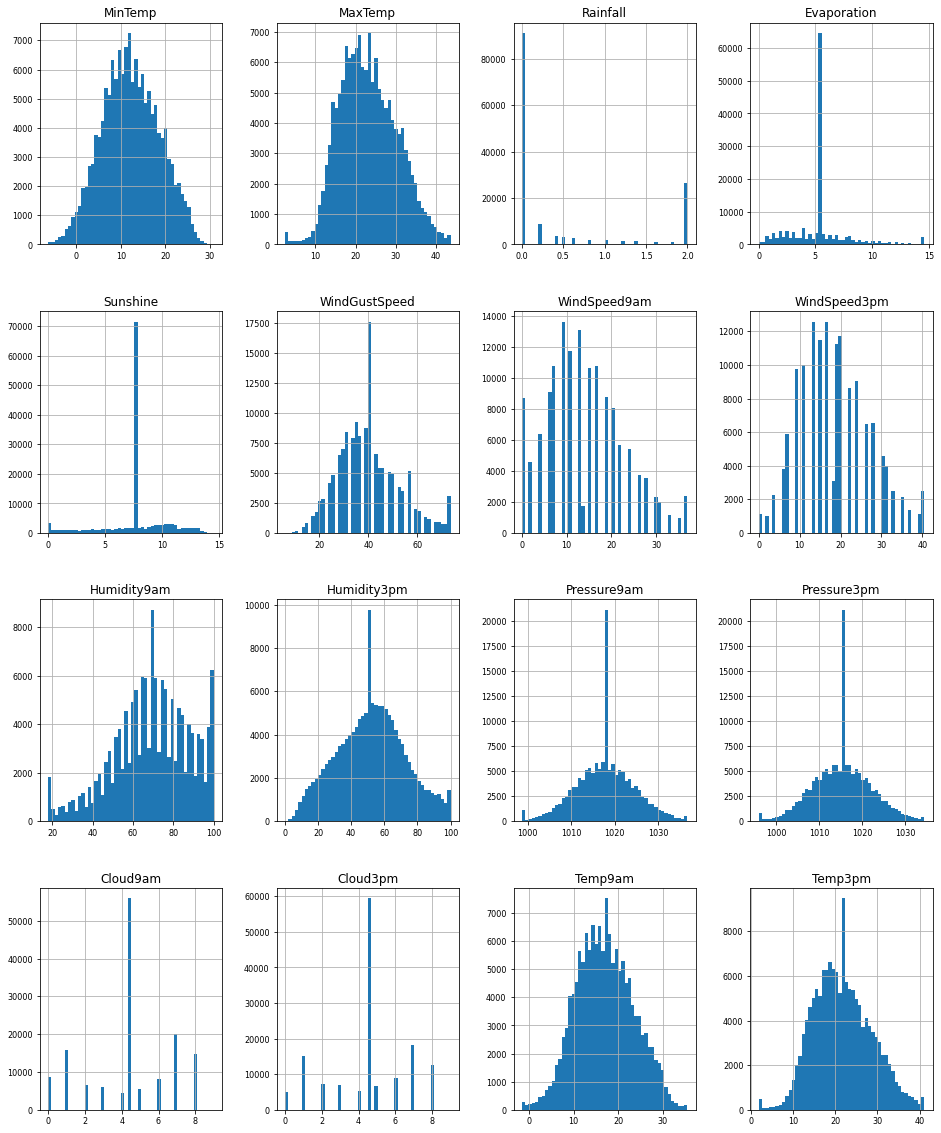

In [14]:
df_num = data.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns

df_num.shape

data['RainTomorrow'].unique()

#View the Frequency Distribution
data['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=data)
plt.show()

# Histogram for Numerical Variables

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Exploring Categorical Variables

df_cat = data.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

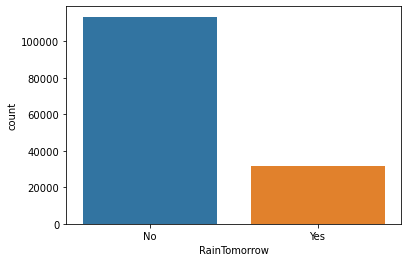

In [15]:
# Exploring Targeted Variable 
sns.countplot(data["RainTomorrow"])


<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

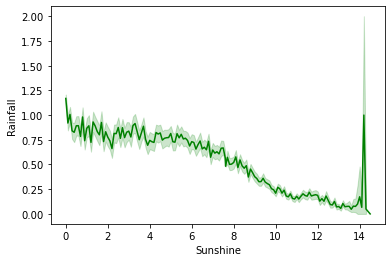

In [16]:
sns.lineplot(data= data,x="Sunshine",y="Rainfall",color = "green")
# we can see sunshine is inversely proportional to the Rainfall 

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

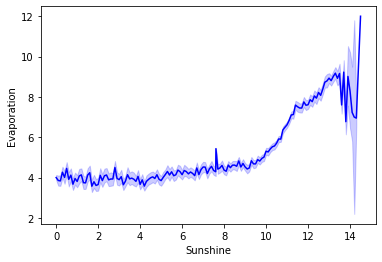

In [17]:
sns.lineplot(data= data,x="Sunshine",y="Evaporation",color = "blue")
# we can see sunshine is directly proportional to the Rainfall 

In [18]:
cat_fea = [i for i in data.columns if data[i].dtype == "O"]
cat_fea
# Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
def encode_cat(feature): 
  mapping_dic = {}        
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic 

for i in cat_fea:   # we have the list of categorical features 
  data[i].replace(encode_cat(i), inplace = True)  
  print(data.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178           W   
1         0      7.4     25.1       0.0     5.318667  7.611178         WNW   
2         0     12.9     25.7       0.0     5.318667  7.611178         WSW   
3         0      9.2     28.0       0.0     5.318667  7.611178          NE   
4         0     17.5     32.3       1.0     5.318667  7.611178           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000   4.50993   
1           44.0        NNW        WSW  ...       1007.8  4.447461   4.50993   
2           46.0          W        WSW  ...       1008.7  4.447461   2.00000   
3           24.0         SE          E  ...       1012.8  4.447461   4.50993   
4           41.0        ENE         NW  ...       1006.0  7.000000   8.00000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year

<AxesSubplot:>

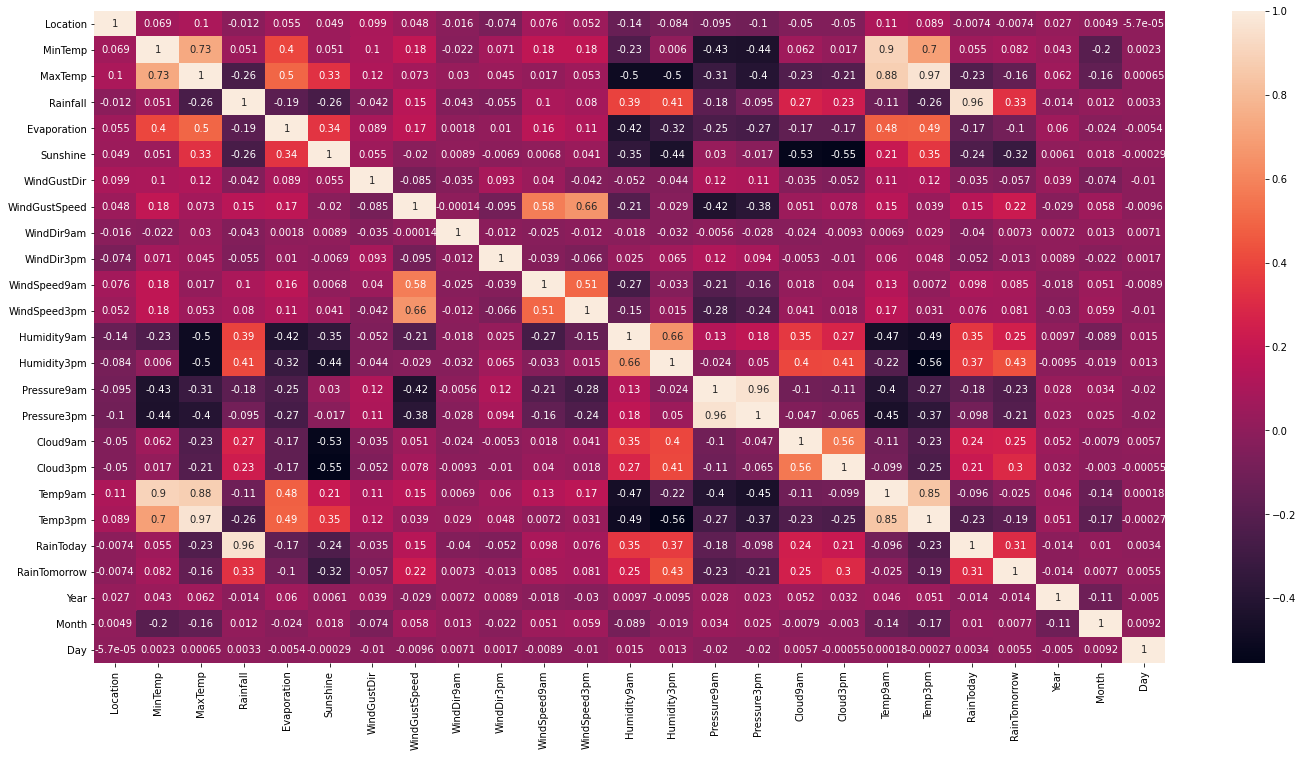

In [21]:
plt.figure(figsize =(24,12))
sns.heatmap(data.corr(), annot = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

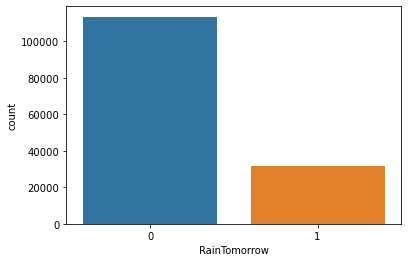

In [22]:
y = data["RainTomorrow"]  # dependent or target 
x = data.drop(["RainTomorrow"],axis = 1)  # indepedent or input 
sns.countplot(data["RainTomorrow"])

In [23]:
# over Sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

(227166, 24) (227166,)


In [24]:
# Feature Estimation
from sklearn.ensemble import ExtraTreesRegressor
feat_sel_model = ExtraTreesRegressor()
feat_sel_model.fit(x,y)
features_imp = feat_sel_model.feature_importances_
features_imp

array([0.02800095, 0.02114427, 0.02059424, 0.17658364, 0.01806909,
       0.05302473, 0.02474452, 0.04965049, 0.02156338, 0.02369422,
       0.02295851, 0.02335563, 0.02822125, 0.18520993, 0.02930371,
       0.0454223 , 0.03205738, 0.07150969, 0.01982362, 0.02033348,
       0.01317243, 0.0228435 , 0.02492102, 0.02379801])

<AxesSubplot:>

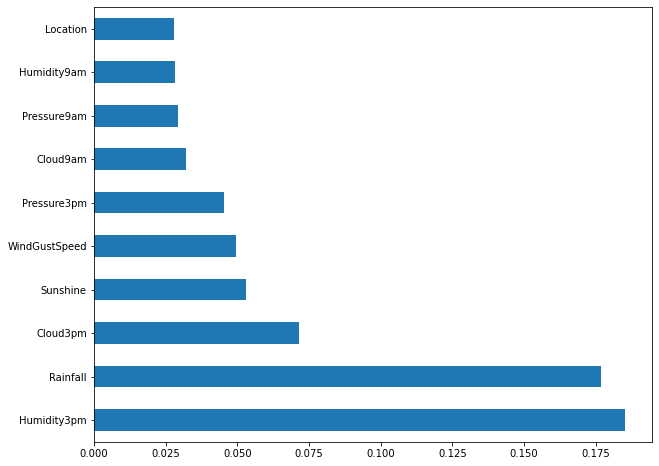

In [25]:
features_imp_val = pd.Series(features_imp, index = x.columns)
plt.figure(figsize=(10,8))
features_imp_val.nlargest(10).plot(kind = "barh")

### spliiting data into tarining and testing

In [26]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [27]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 181732
Length of Testing Data: 45434


In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [29]:
x_test = scaler.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [31]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7937007527402385


In [33]:
print("Train Data Score: {}".format(classifier_logreg.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(x_test, y_test)))

Train Data Score: 0.7912530539475712
Test Data Score: 0.7937007527402385


### Confusion Martix

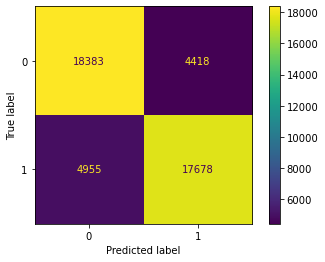

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

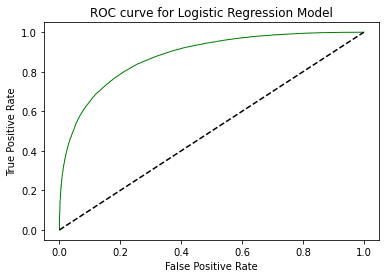

In [35]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.79186728 0.79230748 0.78776206 0.79004567 0.79307214]
Average cross-validation score: 0.7910109273385795


In [37]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

model name  LogisticRegression()
accuracy  0.7937007527402385
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7934586433067746
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.9066998283224017
model name  KNeighborsClassifier()
accuracy  0.8584320112690936


In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_samples=0.9)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9)

In [39]:
RandomForestClassifier(max_samples=0.9)


RandomForestClassifier(max_samples=0.9)

In [40]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9052911916186116


In [42]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.999983492175291
Test Data Score: 0.9052911916186116


In [43]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.999983492175291
Test Data Score: 0.9052911916186116


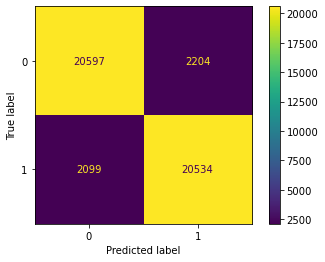

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)

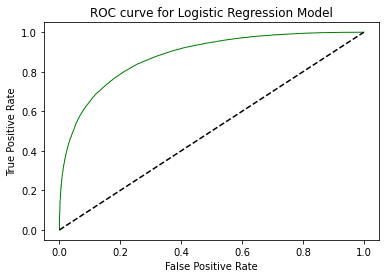

In [45]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
import pickle
pickle.dump(rf, open('iri.pkl', 'wb'))
loaded_model = pickle.load(open("iri.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9066998283224017
